<a href="https://colab.research.google.com/github/JuanCamiloGB/Signals-and-Systems/blob/master/Taller01/4.%20Discretizaci%C3%B3n%20de%20se%C3%B1ales%20cosenoidales/Ejercicio_Simular_el_Proceso_de_discretizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. Discretización de señales cosenoidales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib as mb

###a) Se pretende muestrear la señal  
$$x(t)=10cos(\Omega t);  t\in[0,T];  \Omega=2\pi F;  F=1/T; F=50 Hz $$ 
###Se emplea un sistema de discretización con frecuencia de muestreo 
$$ Fs=80Hz$$
###estime la señal capturada. Realice una simulación en Python del proceso de discretización.


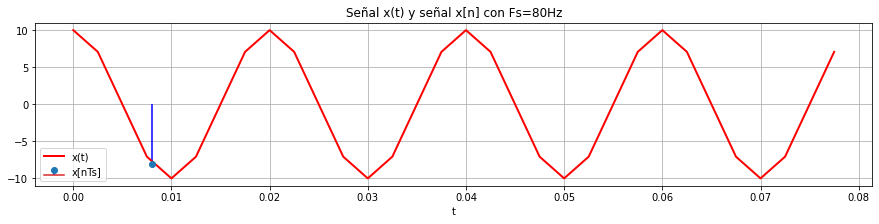

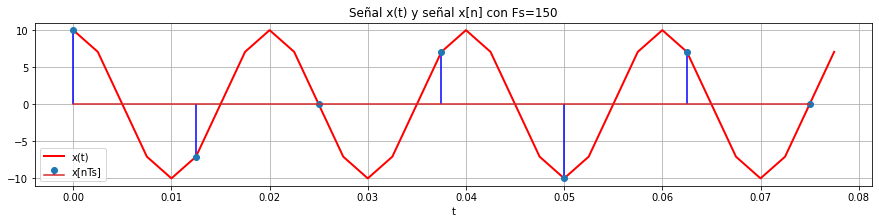

In [27]:
"""Solución"""
A=10
F=50
T=1/F
Fs=80
Ts=1/Fs
Fc=5*Fs
Tc=1/Fc
Fsn=30
Fn=2*Fsn
Tn=1/Fn

wo = 2*np.pi*(F)

#tiempo continuo
t = np.arange(0,4*T,Tc) 
xt=A*np.cos(wo*t)
#tiempo discreto
ts = np.arange(0.4*T,Tn)
#x[n] discreta con Fs
xs = A*np.cos(wo*ts)
txs= np.arange(0,4*T,Ts)
#x[n] discreta con Fn
xn = A*np.cos(wo*txs)

Fc1=Fn
Tc1=1/Fc1
#Señal continua construida con x[n] con Fn
tc= np.arange(0,4*T,Tc1)
xc=A*np.cos(2*np.pi*F*tc)

plt.figure(figsize=(15,3))
plt.plot(t,xt,'r',linewidth=2,label="x(t)") #Señal Continua
plt.stem(ts,xs,'b',label='x[nTs]',use_line_collection= True) #Señal discretizada con Fs=80Hz
plt.title("Señal x(t) y señal x[n] con Fs=80Hz")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()
plt.figure(figsize=(15,3))
plt.plot(t,xt,'r',linewidth=2,label="x(t)") #Señal Continua
plt.stem(txs,xn,'b',label='x[nTs]',use_line_collection= True) #Señal discretizada con Fs Correcta
plt.title("Señal x(t) y señal x[n] con Fs=150")
plt.grid()
plt.legend()
plt.xlabel('t')
plt.show()


###Se tiene un microprocesador de 4 bits con entrada análoga entre -3.3 y 3.3 [v]. Describa las condiciones necesarias para que el microprocesador pueda digitalizarla señal 
$$x(t)=30cos(100\pi t)\ $$ 

###Se tiene un sistema de discretización con frecuencia de muestreo 
$$Fs=40Hz$$ 
###aplicado a las señales
$$x_1(t)=cos(20\pi t)\hspace{2mm}y\hspace{2mm}x_2(t)=cos(100\pi t)$$
###Implemente una simulación en Python del proceso de discretización.

### Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal
$$x(t) = 3 cos(1000\pi t) + 5 sin(6000\pi t) + 10 cos(14000\pi t)$$
###Si se utiliza una frecuencia de muestreo de
$$ 5kHz $$
###cuál es la señal discreta obtenida?

###Demuestre que funciones cosenoidales con frecuencia de oscilación 
$$ Fk = Fo + kFs; t\in Z$$
###No son distinguibles de la funcion 
$$Cos(2\pi Fot)$$
###al utilizar un sistema de discretización con frecuencia de muestreo
$$Fs$$
###Realice simulaciones para
$$K\in [0,\pm 1,\pm 2,\pm 3]$$